# Detección de intrusos en redes

Estos datos fueron usados para la edición de 1999 del KDD cup. Los datos fueron generados por Lincoln Labs: _Nueve semanas de registro de paquetes TCP fueron recolectadas para una red LAN de una oficina de las fuerzas aéreas de USA._ Durante el uso de la LAN, _varios ataques_ fueron ejecutados por el personal. El paquete crudo fue agregado junto con la información de la conexión. 

Para cada registro, algunas características extra fueron derivadas, basados en conocimiento del dominio sobre ataques a redes; _hay 38 tipos diferentes de ataques, pertenecientes a 4 categorías principales_. Algunos tipos de ataque aparecen solo en los datos de prueba(test data), y las frecuencias de los tipo de ataque en los conjuntos de entrenamiento y prueba no son las mismas(para hacerlo más realista). Información adicional sobre los datos puede ser encontrada en (http://kdd.ics.uci.edu/databases/kddcup99/task.html) y los resumenes de los resultados de la competencia KDD cup (http://cseweb.ucsd.edu/~elkan/clresults.html). En la última página también se indica que hay una matriz de costo asociada con las equivocaciones.  El ganador de la competencia usó árboles de decisión C5 en combinación con boosting y bagging.

**Referencias**:
- PNrule: _A New Framework for Learning Classifier Models in Data Mining (A Case-Study in Network Intrusion Detection) (2000) by R. Agarwal and M. V. Joshi_. This paper proposes a new, very simple rule learning algorithm, and tests it on the network intrusion dataset. In the first stage, rules are learned to identify the target class, and then in the second stage, rules are learned to identify cases that were incorrectly classified as positive according to the first rules.


A continuación aplicaremos algunos conceptos de minería de datos en la solución de un problema real.

## Aplicación de diferentes metodos de Clasificación

Procedemos a utilizar diferentes metodos de clasificación de los datos, continuando con el proceso visto en el [documento anterior](Deteccion%20intrusos%20redes.ipynb) donde se describe el problema y se realizó un análisis exploratorio de los datos junto con algunas tareas de mineria de datos.

### Cargamos los datos depurados anteriormente

In [3]:
# Cargamos la librería pandas para procesar los datos como tablas
import pandas as pd
ataques = pd.read_csv('data/kddcup.data10p_preprocessed.csv', sep=',', decimal='.')
ataques.head()

,srv_count,service_ecr_i,dst_host_same_src_port_rate,count,protocol_type_tcp,same_srv_rate,flag_SF,dst_host_same_srv_rate,dst_host_srv_count,service_private,...,srv_diff_host_rate,service_eco_i,service_domain_u,service_smtp,dst_bytes,service_ftp_data,flag_RSTR,duration,attack_types,attack_category
0,511,1,1.00,511,0,1.00,1,1.00,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
1,1,0,0.08,1,1,1.00,1,0.23,3,0,...,0.0,0,0,1,329,0,0,0,normal,normal
2,13,0,0.00,285,1,0.05,0,0.05,13,1,...,0.0,0,0,0,0,0,0,0,neptune,dos
3,477,1,1.00,477,0,1.00,1,1.00,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
4,18,0,0.00,281,1,0.06,0,0.07,18,1,...,0.0,0,0,0,0,0,0,0,neptune,dos


In [4]:
len(ataques)

370515

In [ ]:
# !wc -l < ./data/kddcup.data10p_preprocessed.csv # Number of lines in dataset

In [5]:
# Buscar datos duplicados
df_Dup = ataques[ataques.duplicated()]
df_Dup.head(20)

,srv_count,service_ecr_i,dst_host_same_src_port_rate,count,protocol_type_tcp,same_srv_rate,flag_SF,dst_host_same_srv_rate,dst_host_srv_count,service_private,...,srv_diff_host_rate,service_eco_i,service_domain_u,service_smtp,dst_bytes,service_ftp_data,flag_RSTR,duration,attack_types,attack_category
8,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
10,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
12,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
14,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
17,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
19,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
20,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
21,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
22,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos
23,511,1,1.0,511,0,1.0,1,1.0,255,0,...,0.0,0,0,0,0,0,0,0,smurf,dos


In [6]:
# Eliminar duplicados
ataques.drop_duplicates(inplace=True)
len(ataques)

112911

In [7]:
label_names = ataques.attack_category.unique()
label_names

array(['dos', 'normal', 'r2l', 'probe', 'u2r'], dtype=object)

De acuerdo a los análisis las 40 variables o predictores con mayor relevancia fueron:

['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'service_private',
       'logged_in', 'flag_S0', 'dst_host_srv_serror_rate', 'dst_host_count',
       'srv_serror_rate', 'serror_rate', 'service_http',
       'dst_host_serror_rate', 'protocol_type_udp', 'src_bytes', 'rerror_rate',
       'flag_REJ', 'srv_rerror_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_rerror_rate', 'hot', 'dst_host_rerror_rate',
       'dst_host_srv_diff_host_rate', 'diff_srv_rate', 'service_other',
       'wrong_fragment', 'num_compromised', 'srv_diff_host_rate',
       'service_eco_i', 'service_domain_u', 'service_smtp', 'dst_bytes',
       'service_ftp_data', 'flag_RSTR', 'duration']
       
Estas se encuentran en orden de mayor a menor significancia.

De acuerdo a otro metodo útilizado las variables mas relevantes serían:

*'srv_count', 'count', 'src_bytes', 'dst_host_same_src_port_rate', 'service_ecr_i'*

In [8]:
ataques.columns

Index(['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'service_private',
       'logged_in', 'flag_S0', 'dst_host_srv_serror_rate', 'dst_host_count',
       'srv_serror_rate', 'serror_rate', 'service_http',
       'dst_host_serror_rate', 'protocol_type_udp', 'src_bytes', 'rerror_rate',
       'flag_REJ', 'srv_rerror_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_rerror_rate', 'hot', 'dst_host_rerror_rate',
       'dst_host_srv_diff_host_rate', 'diff_srv_rate', 'service_other',
       'wrong_fragment', 'num_compromised', 'srv_diff_host_rate',
       'service_eco_i', 'service_domain_u', 'service_smtp', 'dst_bytes',
       'service_ftp_data', 'flag_RSTR', 'duration', 'attack_types',
       'attack_category'],
      dtype='object')

In [9]:
# Seleccion de los predictores
predictores_small = ['srv_count', 'count', 'src_bytes', 'dst_host_same_src_port_rate', 'service_ecr_i']
predictores15var = ['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'service_private',
       'logged_in', 'flag_S0', 'dst_host_srv_serror_rate', 'dst_host_count',
       'srv_serror_rate']
predictores = ['srv_count', 'service_ecr_i', 'dst_host_same_src_port_rate', 'count',
       'protocol_type_tcp', 'same_srv_rate', 'flag_SF',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'service_private',
       'logged_in', 'flag_S0', 'dst_host_srv_serror_rate', 'dst_host_count',
       'srv_serror_rate', 'serror_rate', 'service_http',
       'dst_host_serror_rate', 'protocol_type_udp', 'src_bytes', 'rerror_rate',
       'flag_REJ', 'srv_rerror_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_rerror_rate', 'hot', 'dst_host_rerror_rate',
       'dst_host_srv_diff_host_rate', 'diff_srv_rate', 'service_other',
       'wrong_fragment', 'num_compromised', 'srv_diff_host_rate',
       'service_eco_i', 'service_domain_u', 'service_smtp', 'dst_bytes',
       'service_ftp_data', 'flag_RSTR', 'duration']

# Definimos X (predictores) e y (respuesta)
X = ataques[predictores_small]
y = ataques.attack_category

In [10]:
X.head()

,srv_count,count,src_bytes,dst_host_same_src_port_rate,service_ecr_i
0,511,511,1032,1.00,1
1,1,1,2015,0.08,0
2,13,285,0,0.00,0
3,477,477,520,1.00,1
4,18,281,0,0.00,0


In [11]:
X.shape

(112911, 5)

In [12]:
%matplotlib inline

from time import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

plt.style.use('seaborn-white')


## Arbol de decisión

In [161]:
t0 = time()
# seperamos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

# Ajustamos un árbol de clasificación con 15 niveles máximo (max_depth=15) sobre todos los datos
treeclf = DecisionTreeClassifier(max_depth=15, random_state=1)
treeclf.fit(X_train,y_train)
# Verificamos la precisión de nuestro modelo, tanto como los datos de entrenamiento y los de validación
print("Score Datos Entranamiento: ",treeclf.score(X_train,y_train))
print("Score Datos Validación: ",treeclf.score(X_test,y_test))

print("Tiempo total: %.2fs" % (time() - t0))

Score Datos Entranamiento:  0.996315671386
Score Datos Validación:  0.99426101743
Tiempo total: 0.53s


Tiempo total: 0.24s


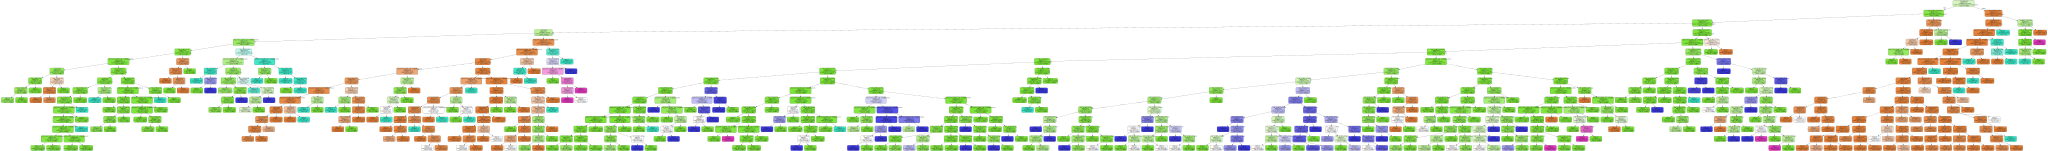

In [162]:
t0 = time()

# Exportamos los datos del arbol a un archivo
export_graphviz(treeclf,out_file='./data/ataques_4variables.dot',  
                impurity=True, filled=True, rounded=True, special_characters=True, 
                feature_names=predictores_small, 
                class_names= label_names ) # attack_category

# Leemos los datos guardados en el paso anterior
with open('./data/ataques_4variables.dot') as f:
    dot_graph=f.read()


print("Tiempo total: %.2fs" % (time() - t0))
# Creamos la gráfica a partir de los datos anteriores
graphviz.Source(dot_graph)


# En la línea de comandos se puede utilizar lo sgte para guardar la gráfica en un archivo, 
# Ejecute esta línea para convertirlo formato PNG:
# dot -Tpng ataques_4variables.dot -o ataques_4variables.png

### Validamos contra los datos de prueba

In [166]:
# Cargamos los datos para predicción o clasificación de intrusos
data_unlabeled = pd.read_csv('data/kddcup.newtestdata_10_percent_unlabeled', 
                 sep=',', decimal='.', header=None, names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
             'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
             'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
             'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
             'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
             'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
                 )

protocol_type_dummies = pd.get_dummies(data_unlabeled.protocol_type, prefix='protocol_type').iloc[:, 1:]
service_dummies = pd.get_dummies(data_unlabeled.service, prefix='service').iloc[:, 1:]
flag_dummies = pd.get_dummies(data_unlabeled.flag, prefix='flag').iloc[:, 1:]

# Unimos las columnas de las variables dummy con el DataFrame original
# notar: axis=0 significa filas, axis=1 significa columnas
data_unlabeled = pd.concat([data_unlabeled, protocol_type_dummies, service_dummies, flag_dummies], axis=1)

# Eliminar las variables categóricas
data_unlabeled.drop(['protocol_type','service','flag'], axis=1, inplace=True)

# visualizamos el DataFrame actualizado
data_unlabeled.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,829,327,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,284,765,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,0,304,3634,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [167]:
print("número de datos",len(data_unlabeled))
# Eliminar duplicados
data_unlabeled.drop_duplicates(inplace=True)
print(len(data_unlabeled))

número de datos 311079
77288


In [88]:
# Guardar los resultados
data_unlabeled.to_csv('data/testdata10p_unlabeled.csv', sep=',', decimal='.', header=True, index=False)

In [168]:
# Predicción de las etiquetas en los datos de validación
y_pred = treeclf.predict(data_unlabeled[predictores_small])
y_pred[10:]

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'], dtype=object)

Como no tenemos los datos con etiquetas no podemos evaluar que tan bien nuestro primer modelo sencillo de árboles de decisión se ajusta a los datos de validación.

In [169]:
# Cargamos los datos corregidos que pertenecen a los datos de test del 10% con etiquetas
data_labeled_crrg = pd.read_csv('data/corrected', 
                 sep=',', decimal='.', header=None, names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
             'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
             'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
             'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
             'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
             'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_types']
                 )

data_labeled_crrg.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [170]:
print("número de datos",len(data_labeled_crrg))
# Eliminar duplicados
data_labeled_crrg.drop_duplicates(inplace=True)
print(len(data_labeled_crrg))

número de datos 311029
77291


In [171]:
data_labeled_crrg.sample(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
151937,0,tcp,http,SF,317,300,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,normal.
303522,0,tcp,pop_3,S0,0,0,0,0,0,0,...,10,0.04,0.09,0.00,0.00,1.00,1.0,0.0,0.0,neptune.
154191,0,tcp,http,SF,334,3049,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.01,0.0,0.0,0.0,normal.


In [173]:
data_labeled_crrg.attack_types.unique()

array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
       'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
       'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
       'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
       'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
       'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
       'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
       'snmpguess.'], dtype=object)

In [174]:
data_labeled_crrg['attack_types'] = data_labeled_crrg['attack_types'].str.replace('.','')
data_labeled_crrg.attack_types.unique()

array(['normal', 'snmpgetattack', 'named', 'xlock', 'smurf', 'ipsweep',
       'multihop', 'xsnoop', 'sendmail', 'guess_passwd', 'saint',
       'buffer_overflow', 'portsweep', 'pod', 'apache2', 'phf', 'udpstorm',
       'warezmaster', 'perl', 'satan', 'xterm', 'mscan', 'processtable',
       'ps', 'nmap', 'rootkit', 'neptune', 'loadmodule', 'imap', 'back',
       'httptunnel', 'worm', 'mailbomb', 'ftp_write', 'teardrop', 'land',
       'sqlattack', 'snmpguess'], dtype=object)

In [175]:
len(data_labeled_crrg.attack_types.unique())

38

Como podemos ver la lista de ataques contiene algunos ataques que no aparecen en nuestro conjunto de datos de ejemplo. La lista de entrenamiento contenia **24 tipos diferentes**, esta tiene **38**. Por lo que es necesario conocer de que se tratan para poder agruparlos correctamente; por el momento como no sabemos a que grupo podrian corresponder debemos asignar a una nueva categoria que en mi caso la llamaré "**Unknown**" o desconocidos.


In [176]:
# Crear un nuevo predictor de categorías de tipos de ataques
data_labeled_crrg['attack_category'] = data_labeled_crrg.attack_types.map({'normal': 'normal', 'buffer_overflow':'u2r', 
                                                       'loadmodule':'u2r', 'perl':'u2r', 'neptune':'dos',
                                                       'smurf':'dos','guess_passwd':'r2l', 'pod':'dos', 
                                                       'teardrop':'dos', 'portsweep':'probe','ipsweep':'probe',
                                                       'land':'dos','ftp_write':'r2l','back':'dos','imap':'r2l',
                                                       'satan':'probe','phf':'r2l','nmap':'probe',
                                                       'multihop':'r2l','warezmaster':'r2l','warezclient':'r2l',
                                                       'spy':'r2l','rootkit':'u2r', 'snmpgetattack':'unknown', 
                                                       'named':'unknown', 'xlock':'unknown', 'xsnoop':'unknown', 
                                                        'sendmail':'unknown', 'saint':'unknown','apache2':'unknown', 
                                                        'udpstorm':'unknown','xterm':'unknown', 'mscan':'unknown', 
                                                        'processtable':'unknown', 'ps':'unknown','httptunnel':'unknown', 
                                                        'worm':'unknown', 'mailbomb':'unknown','sqlattack':'unknown', 
                                                        'snmpguess':'unknown' })

In [177]:
data_labeled_crrg['attack_category'].unique()

array(['normal', 'unknown', 'dos', 'probe', 'r2l', 'u2r'], dtype=object)

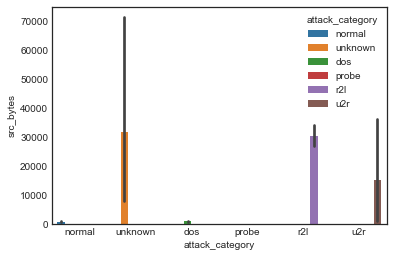

In [182]:
sns.barplot(x="attack_category", y="src_bytes", hue="attack_category", data=data_labeled_crrg);

In [183]:
# Guardar los resultados
data_labeled_crrg.to_csv('data/corrected_ege.csv', sep=',', decimal='.', header=True, index=False)

In [184]:
# Creamos las variables dummy
protocol_type_dummies = pd.get_dummies(data_labeled_crrg.protocol_type, prefix='protocol_type').iloc[:, 1:]
service_dummies = pd.get_dummies(data_labeled_crrg.service, prefix='service').iloc[:, 1:]
flag_dummies = pd.get_dummies(data_labeled_crrg.flag, prefix='flag').iloc[:, 1:]

# Unimos las columnas de las variables dummy con el DataFrame original
# notar: axis=0 significa filas, axis=1 significa columnas
data_labeled_crrg = pd.concat([data_labeled_crrg, protocol_type_dummies, service_dummies, flag_dummies], axis=1)

# Eliminar las variables categóricas
data_labeled_crrg.drop(['protocol_type','service','flag'], axis=1, inplace=True)

# visualizamos el DataFrame actualizado
data_labeled_crrg.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,223,185,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11,0,230,260,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,0,105,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [185]:
feature_cols = data_labeled_crrg.columns
feature_cols.drop(['attack_types', 'attack_category'])
Xt = data_labeled_crrg[predictores_small]
yt = data_labeled_crrg.attack_category

print("Score Datos Validación: ",treeclf.score(Xt,yt))

Score Datos Validación:  0.913806264636


In [186]:
# make predictions for testing set
y_pred_class = treeclf.predict(Xt)

from sklearn.metrics import confusion_matrix
confusion_matrix(yt, y_pred_class)

array([[21694,    20,     6,     0,     0,     0],
       [  115, 47524,   202,    62,    10,     0],
       [   68,   101,  1096,     0,     4,     0],
       [  202,  1811,     0,   315,     0,     0],
       [    0,    37,     0,     2,     0,     0],
       [  790,  2744,   334,     5,   149,     0]])

In [187]:
len(y_pred)

77288

In [188]:
len(y_pred_class)
# confusion_matrix(y_pred_class, y_pred)

77291

** Tenia pensado que los datos "corrected" eran los mismos que el 10% de los datos nuevos sin etiquetas, según lo que entendí o leí en la descripción del problema o pagina donde se descargarón los datos**

Por lo anterior, se observa que son dos muestras con cantidad de datos diferentes por lo que no son las mismas y no se puede hacer una validación cruzada entre los datos predichos y los datos reales.

### Utilizando mas variables en nuestro primer modelo


In [192]:
# Definimos X (predictores) e y (respuesta)
X = ataques[predictores15var] # predictores_small , predictores15var , predictores
y = ataques.attack_category

t0 = time()
# seperamos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

# Ajustamos un árbol de clasificación con 15 niveles máximo (max_depth=15) sobre todos los datos
treeclf = DecisionTreeClassifier(max_depth=15, random_state=1)
treeclf.fit(X_train,y_train)
# Verificamos la precisión de nuestro modelo, tanto como los datos de entrenamiento y los de validación
print("Score Datos Entranamiento: ",treeclf.score(X_train,y_train))
print("Score Datos Validación en el entrenamiento: ",treeclf.score(X_test,y_test))

Score Datos Entranamiento:  0.993711805863
Score Datos Validación en el entrenamiento:  0.98969711283


In [205]:
# Validamos los datos de prueba
# Xt = data_unlabeled[predictores15var]
#yt = data_unlabeled.attack_category
#print("Score Datos Validación: ",treeclf.score(Xt,yt))
# y_pred_class = treeclf.predict(Xt)

# Validamos los datos de prueba
Xt = data_labeled_crrg[predictores15var]
yt = data_labeled_crrg.attack_category
print("Score Datos Validación corregidos: ",treeclf.score(Xt,yt))

# make predictions for testing set
y_pred_class = treeclf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

#print("Tiempo total: %.2fs" % (time() - t0))

Score Datos Validación corregidos:  0.900065984397
[[21265   382    73     0     0     0]
 [  296 46923   650    36     8     0]
 [  148    10  1111     0     0     0]
 [    4  2043    11   268     2     0]
 [    0    39     0     0     0     0]
 [  512  2831   432   246     1     0]]
Tiempo total: 4149.03s


In [215]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[21265   382    73     0     0     0]
 [  296 46923   650    36     8     0]
 [  148    10  1111     0     0     0]
 [    4  2043    11   268     2     0]
 [    0    39     0     0     0     0]
 [  512  2831   432   246     1     0]]
Normalized confusion matrix
[[  9.79e-01   1.76e-02   3.36e-03   0.00e+00   0.00e+00   0.00e+00]
 [  6.18e-03   9.79e-01   1.36e-02   7.51e-04   1.67e-04   0.00e+00]
 [  1.17e-01   7.88e-03   8.75e-01   0.00e+00   0.00e+00   0.00e+00]
 [  1.72e-03   8.78e-01   4.73e-03   1.15e-01   8.59e-04   0.00e+00]
 [  0.00e+00   1.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00]
 [  1.27e-01   7.04e-01   1.07e-01   6.12e-02   2.49e-04   0.00e+00]]


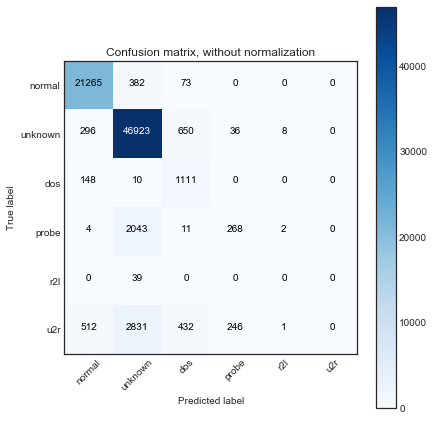

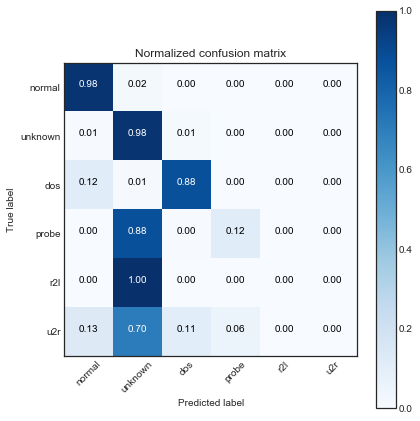

In [216]:
class_names = yt.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [222]:
(21265 + 46923 + 1111 + 268) / len(yt)

0.9000659843966309

In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier(n_jobs=-1)

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 15], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# Best Classifier with the params below
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train, y_train)

In [227]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.989638070497


### Validate with KFold

In [232]:
from sklearn.model_selection import KFold

def run_kfold(clf):
    #kf = KFold(891, n_folds=10)
    kf = KFold(n_splits=10, shuffle=False, random_state=35)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

t0 = time()
run_kfold(clf)
print("Tiempo total: %.2fs" % (time() - t0))

Fold 1 accuracy: 0.9892844491675522
Fold 2 accuracy: 0.9904348596227084
Fold 3 accuracy: 0.9899920290496856
Fold 4 accuracy: 0.9908776901957311
Fold 5 accuracy: 0.9894606323620583
Fold 6 accuracy: 0.9909662563103356
Fold 7 accuracy: 0.9892835001328492
Fold 8 accuracy: 0.9909662563103356
Fold 9 accuracy: 0.9908776901957311
Fold 10 accuracy: 0.9901691612788946
Mean Accuracy: 0.990231252462588
Tiempo total: 8.98s


Score Datos Validación corregidos:  0.909691943435
Confusion matrix, without normalization
[[21309   362    49     0     0     0]
 [  217 47497   181    18     0     0]
 [   39    12  1218     0     0     0]
 [    0  2040     1   287     0     0]
 [    0    37     0     2     0     0]
 [  646  3040   330     6     0     0]]
Normalized confusion matrix
[[  9.81e-01   1.67e-02   2.26e-03   0.00e+00   0.00e+00   0.00e+00]
 [  4.53e-03   9.91e-01   3.78e-03   3.76e-04   0.00e+00   0.00e+00]
 [  3.07e-02   9.46e-03   9.60e-01   0.00e+00   0.00e+00   0.00e+00]
 [  0.00e+00   8.76e-01   4.30e-04   1.23e-01   0.00e+00   0.00e+00]
 [  0.00e+00   9.49e-01   0.00e+00   5.13e-02   0.00e+00   0.00e+00]
 [  1.61e-01   7.56e-01   8.20e-02   1.49e-03   0.00e+00   0.00e+00]]


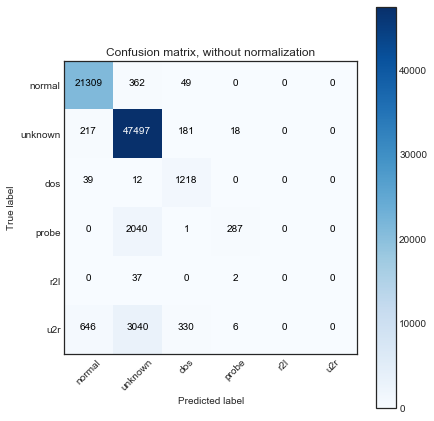

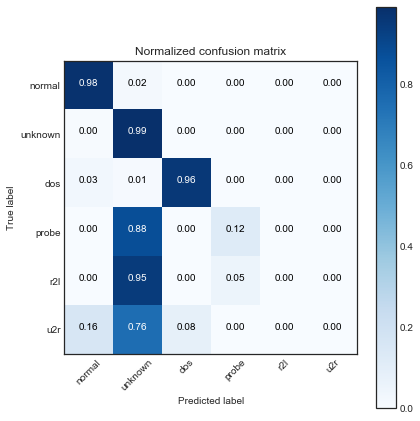

In [235]:
# Validamos los datos de prueba
Xt = data_labeled_crrg[predictores15var]
yt = data_labeled_crrg.attack_category
print("Score Datos Validación corregidos: ",clf.score(Xt,yt))

# make predictions for testing set
y_pred_class = clf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
#print(cnf_matrix)

class_names = yt.unique()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### PERFORMANCE OF THE WINNING ENTRY

The winning entry achieved an average cost of 0.2331 per test example and obtained the following confusion matrix:

|predicted | 0 |  1 | 2  |  3   |   4   |  correct |
|---    | --- | --- | --- | --- | --- | --- |
|0         |   60262 |  243  |  78   |   4 |     6   |    99.5% |
|1         |     511 |  3471 |   184 |   0 |     0   |    83.3% |
|2         |    5299 |  1328 | 223226|   0 |     0   |    97.1% |
|3         |     168 |    20 |     0 |  30 |    10   |    13.2% |
|4         |   14527 |   294 |     0 |   8 |  1360   |     8.4% |
| --- |--- | --- | --- | --- | --- | --- |
| correct  | 74.6% | 64.8% | 99.9% | 71.4% | 98.8% | --- |

In the table above the five attack categories are numbered as follows:

|código| tipo de ataque |
|---| --- |
|0 |	normal                  |
|1 |	probe                   |
|2 |	denial of service (DOS) |
|3 |	user-to-root (U2R)      |
|4 |	remote-to-local (R2L)   |

We briefly describe [our approach](https://www.researchgate.net/publication/220520055_Winning_the_KDD99_Classification_Cup_Bagged_Boosting) for the KDD99 Classification Cup. The solution is essentially a mixture of bagging and boosting. Additionally, asymmetric error costs are taken into account by minimizing the so-called conditional risk. Furthermore, the standard sampling with replacement methodology of bagging was modified to put a specific focus on the smaller but expensive-if-predicted-wrongly classes.

In [239]:
# Matriz de confusión para todos los datos (corrected) del ganador del concurso
#predicted  f0  f1  f2  f3  f4     correct

f0 = 60262 + 243 + 78 + 4 + 6     #  99.5%
f1 = 511 + 3471 + 184 + 0 + 0     #  83.3%
f2 = 5299 + 1328 + 223226 + 0 + 0 #  97.1%
f3 = 168 + 20 + 0 + 30 + 10       #  13.2%
f4 = 14527 + 294 + 0 + 8 + 1360   #   8.4%

#correct 74.6%  64.8%  99.9%  71.4%  98.8%

print("Total de observaciones por tipo de ataque")
print("f0:", f0)
print("f1:", f1)
print("f2:", f2)
print("f3:", f3)
print("f4:", f4)
print("Total: ", (f0+f1+f2+f3+f4))

Total de observaciones por tipo de ataque
f0: 60593
f1: 4166
f2: 229853
f3: 228
f4: 16189
Total:  311029


In [246]:
60262/f0 * 100

99.4537322793062

In [247]:
(60262 + 3471 + 223226 + 30 + 1360) / 311029

0.9270807545277129

** Como se puede observar las matrices no son nada parecidas por lo que se eliminaron los duplicados en las muestras. **

Ahora procederemos a utilizar todos los datos solo para obtener una matríz similar a la del ganador


In [13]:
t0 = time()
# Cargamos los datos corregidos que pertenecen a los datos de test del 10% con etiquetas
data_labeled_crrg = pd.read_csv('data/corrected', 
                 sep=',', decimal='.', header=None, names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
             'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
             'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
             'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
             'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
             'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_types']
                 )

data_labeled_crrg['attack_types'] = data_labeled_crrg['attack_types'].str.replace('.','')
# Crear un nuevo predictor de categorías de tipos de ataques
data_labeled_crrg['attack_category'] = data_labeled_crrg.attack_types.map({'normal': 'normal', 'buffer_overflow':'u2r', 
                                                       'loadmodule':'u2r', 'perl':'u2r', 'neptune':'dos',
                                                       'smurf':'dos','guess_passwd':'r2l', 'pod':'dos', 
                                                       'teardrop':'dos', 'portsweep':'probe','ipsweep':'probe',
                                                       'land':'dos','ftp_write':'r2l','back':'dos','imap':'r2l',
                                                       'satan':'probe','phf':'r2l','nmap':'probe',
                                                       'multihop':'r2l','warezmaster':'r2l','warezclient':'r2l',
                                                       'spy':'r2l','rootkit':'u2r', 'snmpgetattack':'unknown', 
                                                       'named':'unknown', 'xlock':'unknown', 'xsnoop':'unknown', 
                                                        'sendmail':'unknown', 'saint':'unknown','apache2':'unknown', 
                                                        'udpstorm':'unknown','xterm':'unknown', 'mscan':'unknown', 
                                                        'processtable':'unknown', 'ps':'unknown','httptunnel':'unknown', 
                                                        'worm':'unknown', 'mailbomb':'unknown','sqlattack':'unknown', 
                                                        'snmpguess':'unknown' })


# Creamos las variables dummy
protocol_type_dummies = pd.get_dummies(data_labeled_crrg.protocol_type, prefix='protocol_type').iloc[:, 1:]
service_dummies = pd.get_dummies(data_labeled_crrg.service, prefix='service').iloc[:, 1:]
flag_dummies = pd.get_dummies(data_labeled_crrg.flag, prefix='flag').iloc[:, 1:]

# Unimos las columnas de las variables dummy con el DataFrame original
data_labeled_crrg = pd.concat([data_labeled_crrg, protocol_type_dummies, service_dummies, flag_dummies], axis=1)

# Eliminar las variables categóricas
data_labeled_crrg.drop(['protocol_type','service','flag'], axis=1, inplace=True)

# visualizamos el DataFrame actualizado
#data_labeled_crrg.head(10)

In [242]:
feature_cols = data_labeled_crrg.columns
feature_cols.drop(['attack_types', 'attack_category'])
print("Score Validación un solo árbol: ",treeclf.score(Xt,yt))


# Validamos los datos de prueba
# Xt = data_labeled_crrg[predictores_small]
Xt = data_labeled_crrg[predictores15var]
yt = data_labeled_crrg.attack_category
print("Score Validación RF datos corregidos: ",clf.score(Xt,yt))

# make predictions for testing set
y_pred_class = clf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

Score Validación un solo árbol:  0.914159129856
Score Validación RF datos corregidos:  0.917682917027
[[222146   1073     79      0      0      0]
 [   217  60150    208     18      0      0]
 [    41     14   2322      0      0      0]
 [     0   5184      1    808      0      0]
 [     0     37      0      2      0      0]
 [   652  17367    702      8      0      0]]
Tiempo total: 6.00s


In [244]:
yt.sort_values().unique()

array(['dos', 'normal', 'probe', 'r2l', 'u2r', 'unknown'], dtype=object)

        predicted     0      1      2      3      4     %correct
 actual       --------------------------------------------------
    0         |   60262    243     78      4      6       99.5%
    1         |     511   3471    184      0      0       83.3%
    2         |    5299   1328 223226      0      0       97.1%
    3         |     168     20      0     30     10       13.2%
    4         |   14527    294      0      8   1360        8.4%
              |
 %correct     |    74.6%  64.8%  99.9%  71.4%  98.8% 
 
 0 	normal
1 	probe
2 	denial of service (DOS)
3 	user-to-root (U2R)
4 	remote-to-local (R2L)

In [249]:
print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / 311029)
print("Precisión de mi modelo inicial RF: ",(222146 + 60150 + 2322 + 808 + 0) / 311029)

Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial RF:  0.9176829170270296


### Ahora procedemos a entrenar el modelo con mas variables
Como vimos en uno de los análisis de la selección de los mejores predictores, teniamos que habian 40 predictores con gran significancia. Procedemos a probar esta hipotesis con esta cantidad de variables con el fin de saber si mejora nuestra predicción y precisión de nuestro modelo.

In [255]:
# Definimos X (predictores) e y (respuesta)
X = ataques[predictores] # 40 variables
y = ataques.attack_category

t0 = time()
print("Un Solo Árbol de decisión")
# seperamos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=35)

# Ajustamos un árbol de clasificación con 15 niveles máximo (max_depth=15) sobre todos los datos
treeclf = DecisionTreeClassifier(max_depth=15, random_state=35)
treeclf.fit(X_train,y_train)
# Verificamos la precisión de nuestro modelo, tanto como los datos de entrenamiento y los de validación
print("Score Datos Entranamiento: ",treeclf.score(X_train,y_train))
print("Score Datos Validación en el entrenamiento: ",treeclf.score(X_test,y_test))

# Validamos los datos de prueba
Xt = data_labeled_crrg[predictores]
yt = data_labeled_crrg.attack_category
print("Score Datos Validación corregidos: ",treeclf.score(Xt,yt))

# make predictions for testing set
y_pred_class = treeclf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("RANDOM FOREST and BOOSTRAP AGGREGATING (BAGGING)")
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf2 = RandomForestClassifier(n_jobs=-1)

# Choose some parameter combinations to try
parameters2 = {'n_estimators': [5, 10], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10, 15], 
              'min_samples_split': [3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer2 = make_scorer(accuracy_score)

# Run the grid search
grid_obj2 = GridSearchCV(clf2, parameters2, scoring=acc_scorer2)
grid_obj2 = grid_obj2.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf2 = grid_obj2.best_estimator_

# Fit the best algorithm to the data. 
clf2.fit(X_train, y_train)
print(clf2)

print("Tiempo total: %.2fs" % (time() - t0))

predictions2 = clf2.predict(X_test)
print(accuracy_score(y_test, predictions2))


#from sklearn.model_selection import KFold

# def run_kfold2(clf):
#     kf = KFold(n_splits=10, shuffle=False, random_state=35)
#     outcomes = []
#     fold = 0
#     for train_index, test_index in kf.split(X):
#         fold += 1
#         X_train, X_test = X.values[train_index], X.values[test_index]
#         y_train, y_test = y.values[train_index], y.values[test_index]
#         clf.fit(X_train, y_train)
#         predictions = clf.predict(X_test)
#         accuracy = accuracy_score(y_test, predictions)
#         outcomes.append(accuracy)
#         print("Fold {0} accuracy: {1}".format(fold, accuracy))     
#     mean_outcome = np.mean(outcomes)
#     print("Mean Accuracy: {0}".format(mean_outcome)) 

t0 = time()
run_kfold(clf2)
print("Tiempo total: %.2fs" % (time() - t0))


t0 = time()
# Validamos los datos de prueba
Xt = data_labeled_crrg[predictores]
yt = data_labeled_crrg.attack_category
print("Score Validación RF datos corregidos: ",clf2.score(Xt,yt))

# make predictions for testing set
y_pred_class = clf2.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))


Un Solo Árbol de decisión
Score Datos Entranamiento:  0.999139643458
Score Datos Validación en el entrenamiento:  0.998022081833
Score Datos Validación corregidos:  0.918329159017
[[223262     32      4      0      0      0]
 [    55  59545    972     11     10      0]
 [     4     12   2361      0      0      0]
 [     0   5529     10    453      1      0]
 [     0     28      0      5      6      0]
 [   910  16740   1068      5      6      0]]
RANDOM FOREST and BOOSTRAP AGGREGATING (BAGGING)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Tiempo total: 422.04s
0.998819153333
Fold 1 accuracy: 0.9989373007438895
Fold

In [257]:
print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial RF: ",(223262 + 60315 + 2368 + 661 + 1) / len(yt))

Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial RF:  0.9214799906118079


Concluimos que utilizar las 40 variables mas importantes mejora la precisión de nuestro modelo, pero aun queda trabajo por hacer para identificar mejor algunos ataques de baja presencia.

### Probemos ahora con otros ensembles

In [261]:
from sklearn.ensemble import BaggingClassifier

t0 = time()

clf_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_bagging.fit(X_train, y_train)
y_pred = clf_bagging.predict(X_test)
#metrics.f1_score(y_pred, y_test) 
print(metrics.accuracy_score(y_pred, y_test))

print("Tiempo total: %.2fs" % (time() - t0))

0.9990258015
Tiempo total: 25.98s


In [262]:
t0 = time()
# Validamos los datos de prueba
#Xt = data_labeled_crrg[predictores]
#yt = data_labeled_crrg.attack_category
print("Score Validación datos corregidos: ",clf_bagging.score(Xt,yt))

# make predictions for testing set
y_pred_class = clf_bagging.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

Score Validación RF datos corregidos:  0.919640933804
[[223268     27      3      0      0      0]
 [    58  59561    964      9      1      0]
 [     7      3   2367      0      0      0]
 [     0   5144     10    836      3      0]
 [     0     31      0      5      3      0]
 [   777  16875   1070      4      3      0]]
Tiempo total: 15.68s


In [263]:
# Bagging with KNN

t0 = time()
# from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True )

clf_bagging.fit(X_train, y_train)
y_pred = clf_bagging.predict(X_test)
#metrics.f1_score(y_pred, y_test) 
print(metrics.accuracy_score(y_pred, y_test))

print("Tiempo total: %.2fs" % (time() - t0))

t0 = time()
print("Score Validación KNN datos corregidos: ",clf_bagging.score(Xt,yt))

# make predictions for testing set
y_pred_class = clf_bagging.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

0.996339375332
Tiempo total: 760.63s
Score Validación RF datos corregidos:  0.91822627472
[[223163    133      2      0      0      0]
 [   153  60345     93      2      0      0]
 [   287      9   2081      0      0      0]
 [     0   5987      0      6      0      0]
 [     0     39      0      0      0      0]
 [   149  17857    721      2      0      0]]
Tiempo total: 1996.24s


In [264]:
1996.24/60

33.27066666666666

In [269]:
# Utilizando AdaBoost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

t0 = time()

#bdt_real = AdaBoostClassifier( DecisionTreeClassifier(max_depth=15), n_estimators=500, learning_rate=1)
#bdt_discrete = AdaBoostClassifier( DecisionTreeClassifier(max_depth=15), n_estimators=500, learning_rate=1.5,
#    algorithm="SAMME")

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=500) # algorithm="SAMME", algorithm="SAMME.R", learning_rate=1.0

bdt.fit(X_train, y_train)

scores = cross_val_score(bdt, X_train, y_train)
print(scores.mean())

print("Tiempo total: %.2fs" % (time() - t0))

y_pred = bdt.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

t0 = time()
precision = bdt.score(Xt,yt)
print("Score Validación AdaBoost datos corregidos: ",precision)

# make predictions for testing set
y_pred_class = bdt.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial AdaBoost 1: ",precision)

0.999342084771
Tiempo total: 615.47s
0.999350534333
Score Validación AdaBoost datos corregidos:  0.921862591591
[[223281      8      9      0      0      0]
 [    71  60302    217      1      2      0]
 [     4      4   2369      0      0      0]
 [     0   5217      0    773      3      0]
 [     0     33      0      5      1      0]
 [   730  17226    767      4      2      0]]
Tiempo total: 88.97s
Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial AdaBoost 1:  0.921862591591


In [270]:
615.47/60

10.257833333333334

In [271]:
t0 = time()
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=100, algorithm="SAMME", 
                         learning_rate=1.5)

bdt.fit(X_train, y_train)

scores = cross_val_score(bdt, X_train, y_train)
print(scores.mean())

y_pred = bdt.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))
print("Tiempo total: %.2fs" % (time() - t0))

t0 = time()
precision = bdt.score(Xt,yt)
print("Score Validación AdaBoost datos corregidos: ",precision)
# make predictions for testing set
y_pred_class = bdt.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial AdaBoost 2: ",precision)

0.998835939535
0.9993800555
Tiempo total: 102.72s
Score Validación AdaBoost datos corregidos:  0.920763015667
[[223275     19      4      0      0      0]
 [    70  60302    217      2      2      0]
 [     5      3   2369      0      0      0]
 [     0   5554      0    435      4      0]
 [     0     31      0      5      3      0]
 [   651  17284    787      4      3      0]]
Tiempo total: 17.05s
Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial AdaBoost 2:  0.920763015667


### Gradient Boosting Classifier

In [273]:
from sklearn.ensemble import GradientBoostingClassifier

gbclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0)
gbclf.fit(X_train, y_train)
print("Score: ", gbclf.score(X_test, y_test))

t0 = time()
precision = gbclf.score(Xt,yt)
print("Score Validación GBRT datos corregidos: ",precision)
# make predictions for testing set
y_pred_class = gbclf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial AdaBoost 2: ",precision)


Score:  0.998612505166
Score Validación GBRT datos corregidos:  0.919702021355
[[223247     20     23      8      0      0]
 [    55  60293    229     11      5      0]
 [     4      3   2365      4      1      0]
 [     0   5845      4    141      3      0]
 [     0     26      0      5      8      0]
 [   803  16358   1129    431      8      0]]
Tiempo total: 6.79s
Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial AdaBoost 2:  0.919702021355


For datasets with a large number of classes we strongly recommend to use RandomForestClassifier as an alternative to GradientBoostingClassifier.

### Staking or Voting Classifier

In [5]:
%matplotlib inline

from time import time
from itertools import product
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

plt.style.use('seaborn-white')

In [6]:
# Definimos X (predictores) e y (respuesta)
X = ataques[predictores] # predictores_small , predictores15var , predictores
y = ataques.attack_category

Xt = data_labeled_crrg[predictores]
yt = data_labeled_crrg.attack_category

# seperamos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)


NameError: name 'ataques' is not defined

In [14]:
# Training classifiers
t0 = time()
clf1 = DecisionTreeClassifier(max_depth=15)
clf2 = KNeighborsClassifier(n_neighbors=5)
#clf3 = SVC(kernel='rbf', probability=True)
#eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='soft', weights=[1,1])

clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
#clf3 = clf3.fit(X_train,y_train) # Esto toma demasiado tiempo

eclf = eclf.fit(X_train,y_train)
print("Tiempo total: %.2fs" % (time() - t0))

Tiempo total: 9.33s


In [18]:
t0 = time()

# Validamos los datos de prueba
precision = eclf.score(Xt,yt)
print("Score Validación Voting datos corregidos: ",precision)
# make predictions for testing set
y_pred_class = eclf.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial 2: ",precision)

Score Validación Voting datos corregidos:  0.919698806221
[[223243     33     22      0      0      0]
 [   174  60277    134      8      0      0]
 [   191      5   2181      0      0      0]
 [     3   5510    135    345      0      0]
 [     0     30      0      2      7      0]
 [   821  17124    777      3      4      0]]
Tiempo total: 50.88s
Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial AdaBoost 2:  0.919698806221


In [26]:
# Extra Trees Classification
t0 = time()
seed = 7
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
model.fit(X_train, y_train)

precision = model.score(Xt,yt)
print("Score Validación Voting datos corregidos: ",precision)
# make predictions for testing set
y_pred_class = model.predict(Xt)
# Matríz de correlación
cnf_matrix = confusion_matrix(yt, y_pred_class)
print(cnf_matrix)

print("Tiempo total: %.2fs" % (time() - t0))

print("Precisión del modelo ganador: ",(60262 + 3471 + 223226 + 30 + 1360) / len(yt))
print("Precisión de mi modelo inicial 2: ",precision)

0.999253512093
Score Validación Voting datos corregidos:  0.92072764919
[[222947     12    339      0      0      0]
 [    71  60292    225      2      3      0]
 [     3     10   2364      0      0      0]
 [     0   5213      0    768     12      0]
 [     0     33      0      4      2      0]
 [   735  17004    984      3      3      0]]
Tiempo total: 275.26s
Precisión del modelo ganador:  0.9270807545277129
Precisión de mi modelo inicial 2:  0.92072764919


In [ ]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

In [4]:
yt[:100]

NameError: name 'yt' is not defined